In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

In /nethome/bdevnani3/anaconda3/envs/p3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /nethome/bdevnani3/anaconda3/envs/p3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /nethome/bdevnani3/anaconda3/envs/p3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /nethome/bdevnani3/anaconda3/envs/p3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /

In [88]:
data = json.load(open("/nethome/bdevnani3/vis_lang/efficient_finetuning/prompt_engineer/experiments/results/finetune_lambda_split_flowers102.json"))


In [81]:
shots = "16"
iters = "0"
data[shots][iters].keys()

dict_keys(['train_accuracy', 'train_loss', 'lambdas', 'valid_accuracy', 'test_accuracy', 'manually_found_lambdas'])

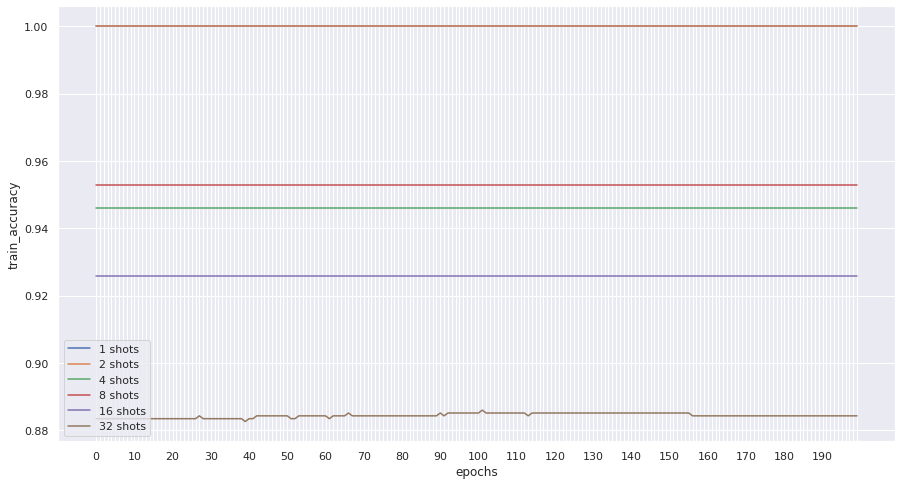

In [82]:
# train_accuracy

sns.set(rc = {'figure.figsize':(15,8)})

for sts in [1,2,4,8,16,32]:
    x = []
    y = []
    for k,v in data[str(sts)][iters]["train_accuracy"].items():
        x.append(k)
        y.append(v)

    plt.plot(x,y, label=f'{sts} shots')
    
frame1 = plt.gca()
# frame1.axes.get_xaxis().set_ticks([])

every_nth = 10
for n, label in enumerate(frame1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        
plt.xlabel('epochs')
plt.ylabel('train_accuracy')
plt.legend()

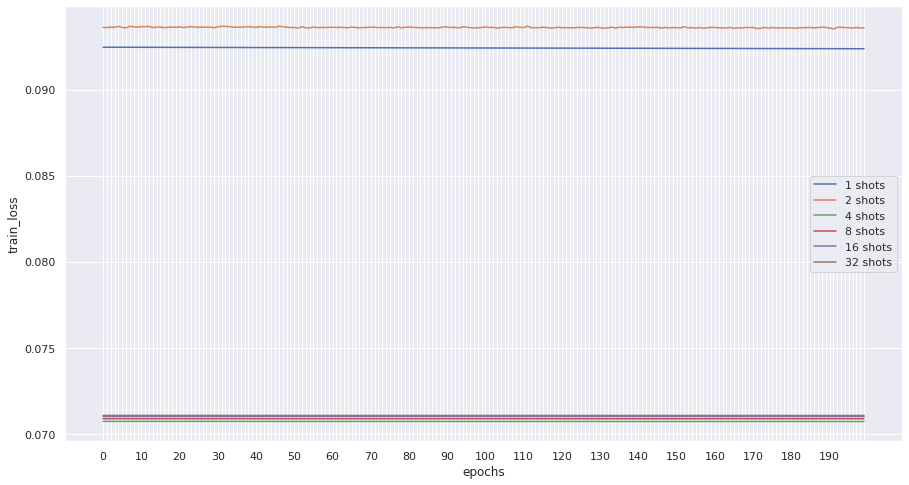

In [83]:
# train_loss

key = "train_loss"

sns.set(rc = {'figure.figsize':(15,8)})

for sts in [1,2,4,8,16,32]:
    x = []
    y = []
    for k,v in data[str(sts)][iters][key].items():
        x.append(k)
        y.append(v)

    plt.plot(x,y, label=f'{sts} shots')
    
frame1 = plt.gca()

every_nth = 10
for n, label in enumerate(frame1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        
plt.xlabel('epochs')
plt.ylabel(key)
plt.legend()

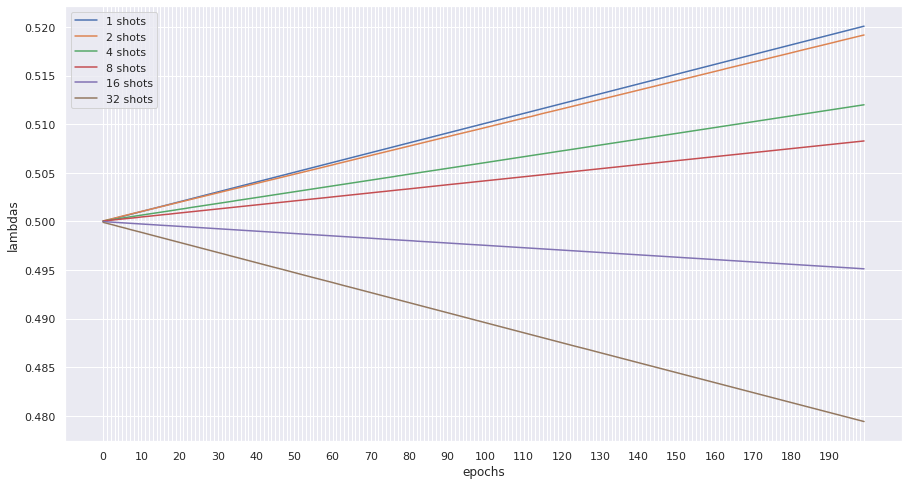

In [84]:
# train_loss

key = "lambdas"

sns.set(rc = {'figure.figsize':(15,8)})

for sts in [1,2,4,8,16,32]:
    x = []
    y = []
    for k,v in data[str(sts)][iters][key].items():
        x.append(k)
        y.append(v)

    plt.plot(x,y, label=f'{sts} shots')
    
frame1 = plt.gca()

every_nth = 10
for n, label in enumerate(frame1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        
plt.xlabel('epochs')
plt.ylabel(key)
plt.legend()

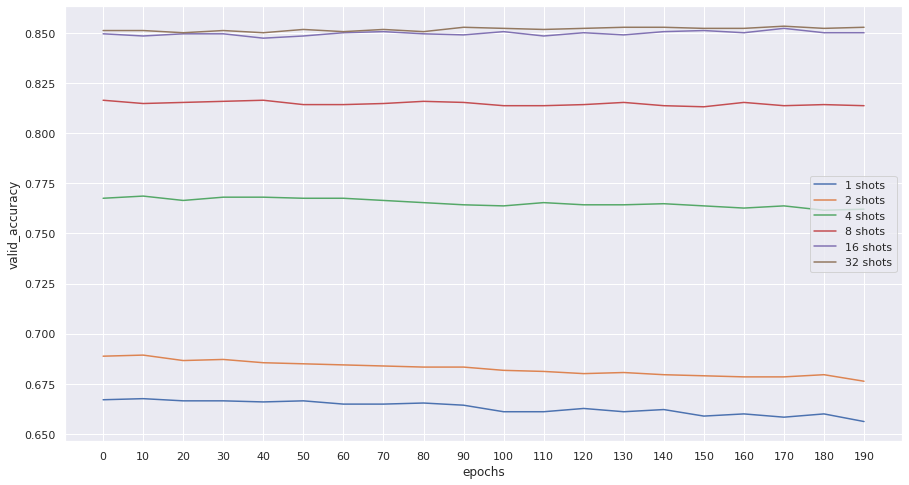

In [85]:
# train_loss

key = "valid_accuracy"

sns.set(rc = {'figure.figsize':(15,8)})

for sts in [1,2,4,8,16,32]:
    x = []
    y = []
    for k,v in data[str(sts)][iters][key].items():
        x.append(k)
        y.append(v)

    plt.plot(x,y, label=f'{sts} shots')
    
frame1 = plt.gca()
        
plt.xlabel('epochs')
plt.ylabel(key)
plt.legend()

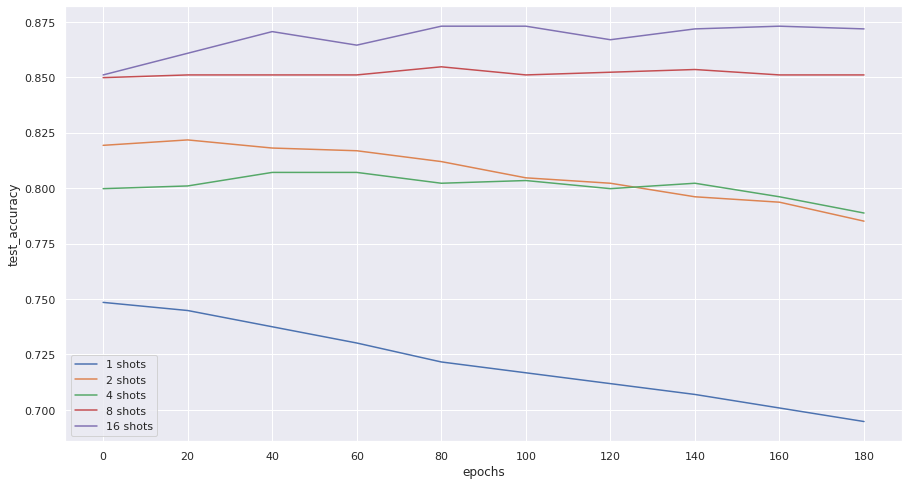

In [68]:
# train_loss

key = "test_accuracy"

sns.set(rc = {'figure.figsize':(15,8)})

for sts in [1,2,4,8,16]:
    x = []
    y = []
    for k,v in data[str(sts)][iters][key].items():
        x.append(k)
        y.append(v)

    plt.plot(x,y, label=f'{sts} shots')
    
frame1 = plt.gca()
        
plt.xlabel('epochs')
plt.ylabel(key)
plt.legend()

In [86]:
# Best lambdas
for sts in [1,2,4,8,16,32]:
    epoch = -1
    highest_accuracy = -1
    for k,v in data[str(sts)]["1"]["train_accuracy"].items():
        if v>highest_accuracy:
            epoch = k
    
    best_lambda = data[str(sts)]["1"]["lambdas"][epoch]
    print(f"Best Lambda for {sts} shots is {best_lambda}")


Best Lambda for 1 shots is 0.5201939940452576
Best Lambda for 2 shots is 0.517379105091095
Best Lambda for 4 shots is 0.5125084519386292
Best Lambda for 8 shots is 0.5060163736343384
Best Lambda for 16 shots is 0.49867337942123413
Best Lambda for 32 shots is 0.478976309299469


In [23]:
# path = "/nethome/bdevnani3/raid/models/PE/flowersFSLTrain/MLP/nway_5_nshot_5_nquery_22_nepisodes_10_nepochs_500/plots_raw.json"
path = "/nethome/bdevnani3/raid/models/PE/flowersFSLTrain/Transformer/nway_5_nshot_5_nquery_22_nepisodes_10_nepochs_500/plots_raw.json"
f = open(path)
data = json.load(f)


In [24]:
data.keys()

dict_keys(['Train Loss', 'Train Acc', 'Best Train Acc'])

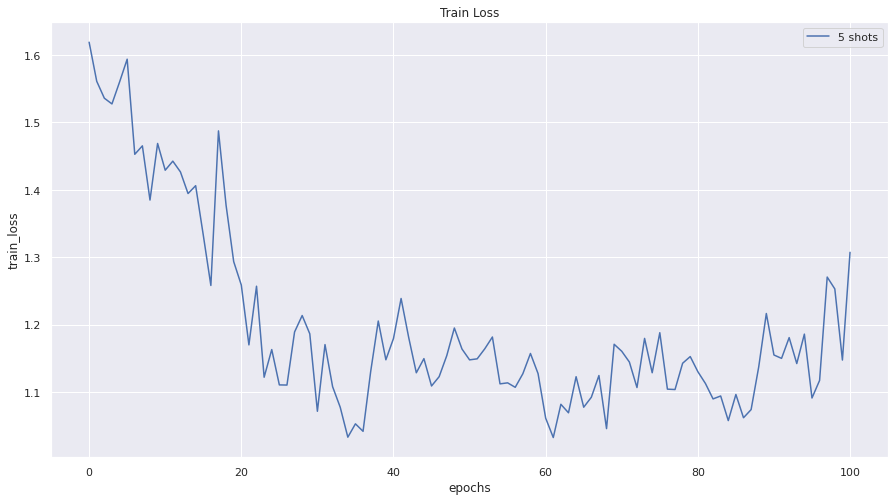

In [26]:
sns.set(rc = {'figure.figsize':(15,8)})
plt.title("Train Loss")

x = range(len(data['Train Loss']))
y = data['Train Loss']
plt.plot(x,y, label=f'5 shots')
plt.xlabel('epochs')
plt.ylabel('train_loss')
plt.legend()

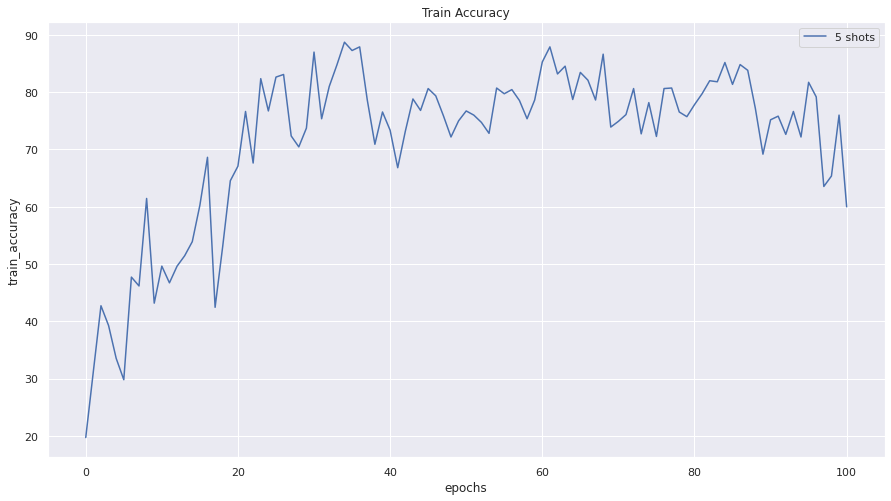

In [27]:
sns.set(rc = {'figure.figsize':(15,8)})
plt.title("Train Accuracy")

x = range(len(data['Train Acc']))
y = data['Train Acc']
plt.plot(x,y, label=f'5 shots')
plt.xlabel('epochs')
plt.ylabel('train_accuracy')
plt.legend()